# Exploratory Data Analysis

### Importing libraries

In [ ]:
from utils import load_data, filter_df_by_label
from visualization import plot_barplot, plot_histogram, plot_word_cloud
from text import get_top_n_words, get_word_cloud

### Load data

In [7]:
dataset_path = "dataset/bbc_data.csv"
data = load_data(file_path=dataset_path)

The dataset contains two columns: `data` and `labels`. The `data` column contains the text data, and the `labels` column contains the corresponding labels for each text entry.

In [8]:
data.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


### Check for missing values

As we can see, there are no missing values in the dataset.

In [9]:
print(data.isna().sum())

data      0
labels    0
dtype: int64


### Label distribution

There are 5 unique labels in the dataset. These are: `entertainment`, `business`, `sport`, `politics`, `tech`

In [10]:
print(data.labels.unique().tolist())

['entertainment', 'business', 'sport', 'politics', 'tech']


As we can see, the labels are almost evenly distributed, with a slight imbalance towards the `entertainment` and `business` categories. Fow now we will not do anything about this imbalance, because it is not too severe. We will keep it in mind for the model training phase, if we see that the model is not performing well on some categories.

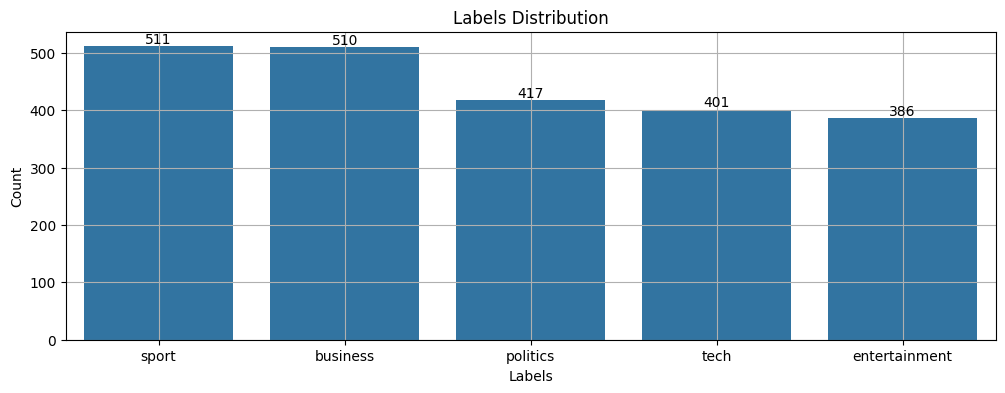

In [11]:
plot_barplot(
    data=data.labels,
    title="Labels Distribution",
    xlabel="Labels",
    ylabel="Count",
)

### Text length distribution

In [12]:
# create the text length column
data["text_length"] = data.data.apply(lambda x: len(x.split()))

As we can see, the text lenth is skewed towards the left, with most of the text entries being less than 1000 words long. There are a few outliers with very long text entries, but they are not too many. We will not do anything about these outliers for now, but we will keep them in mind for the model training phase if we see that the model is not performing well on some samples.

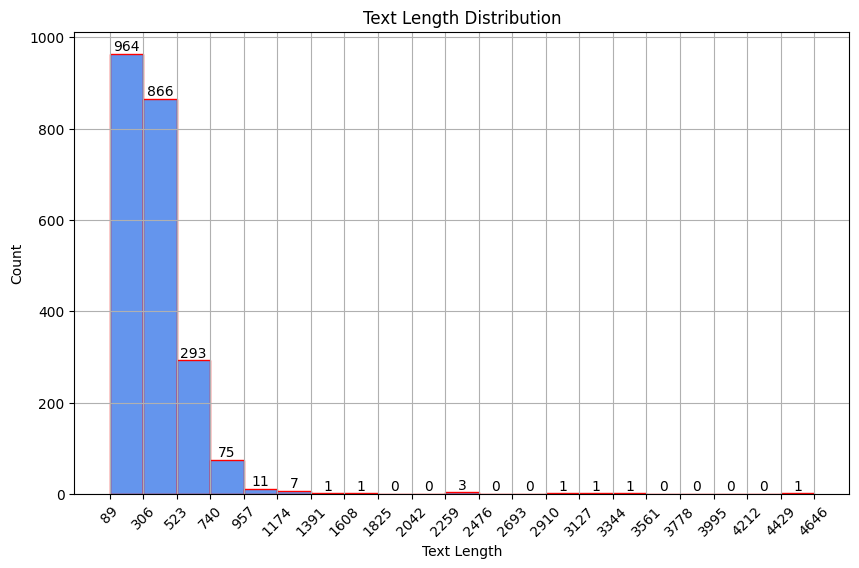

In [13]:
plot_histogram(
    x=data.text_length,
    title="Text Length Distribution",
    xlabel="Text Length",
    ylabel="Count",
    generate_bins=True,
    num_bins=20
)

### Text length distribution per label

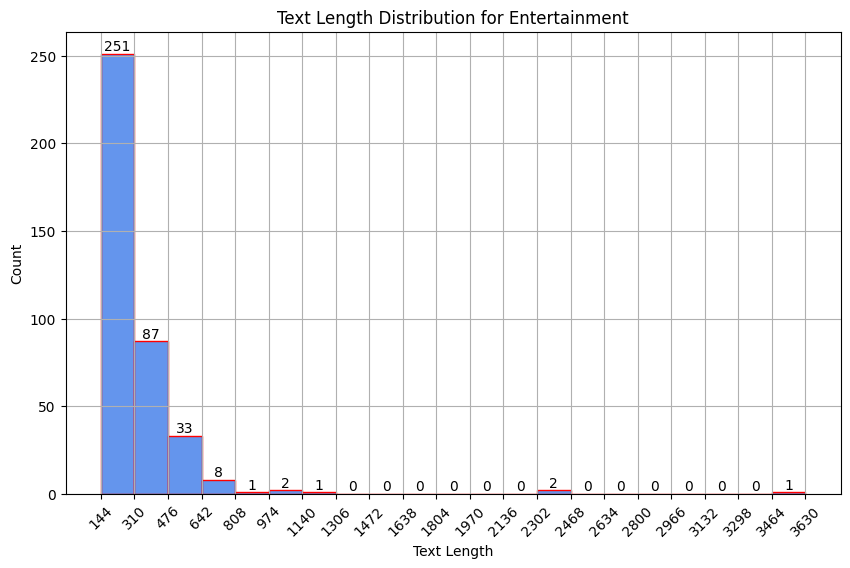

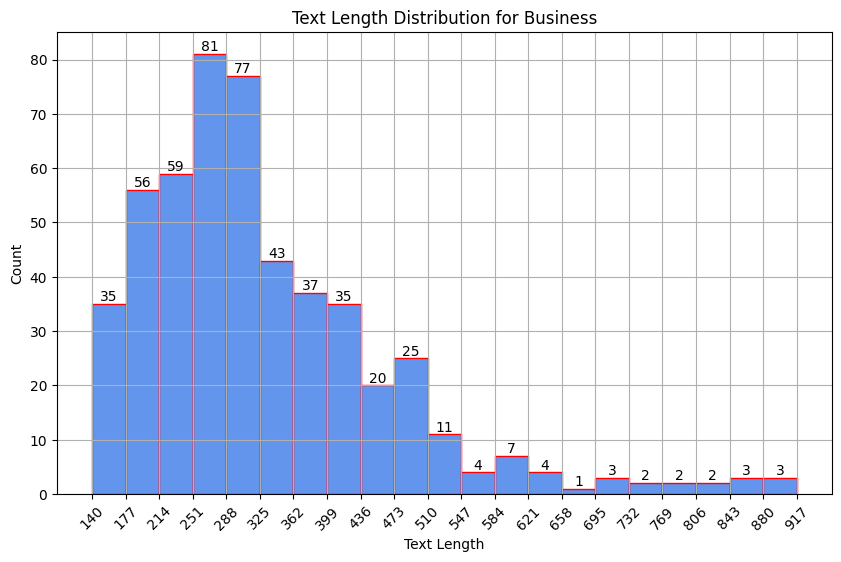

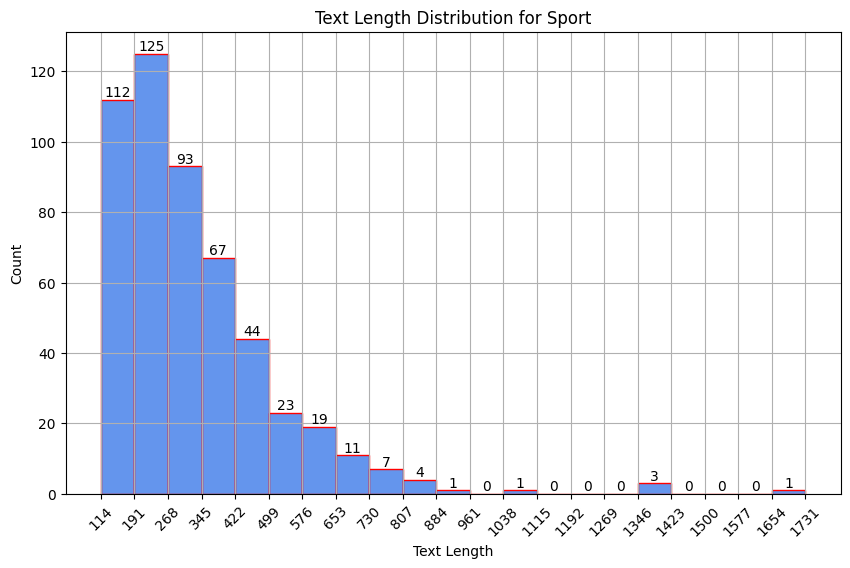

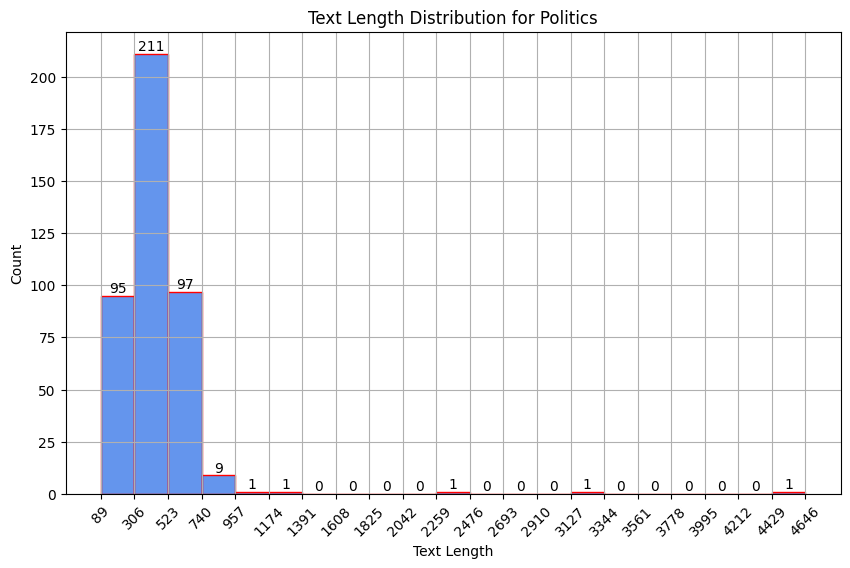

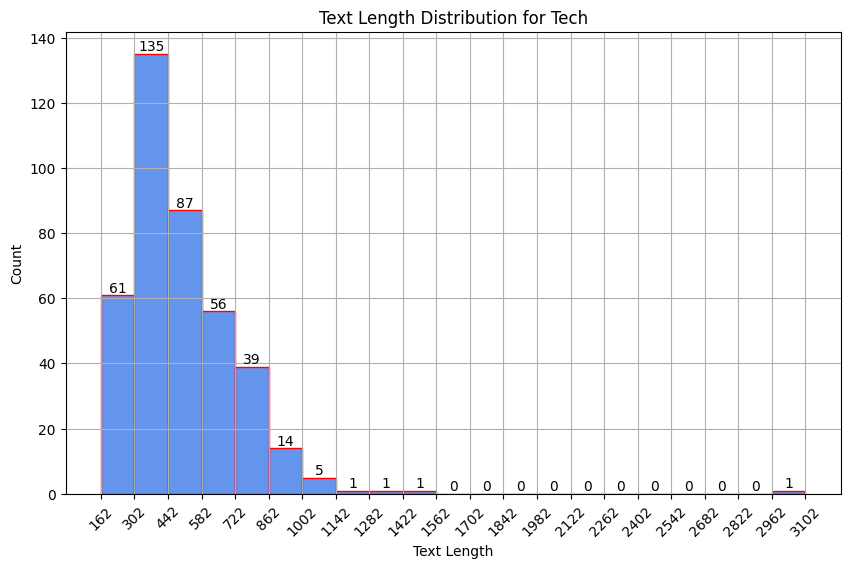

In [14]:
plot_histogram(
    x= filter_df_by_label(df=data, label="entertainment").text_length,
    title="Text Length Distribution for Entertainment",
    xlabel="Text Length",
    ylabel="Count",
    generate_bins=True,
    num_bins=20
)

plot_histogram(
    x= filter_df_by_label(df=data, label="business").text_length,
    title="Text Length Distribution for Business",
    xlabel="Text Length",
    ylabel="Count",
    generate_bins=True,
    num_bins=20
)

plot_histogram(
    x= filter_df_by_label(df=data, label="sport").text_length,
    title="Text Length Distribution for Sport",
    xlabel="Text Length",
    ylabel="Count",
    generate_bins=True,
    num_bins=20
)

plot_histogram(
    x= filter_df_by_label(df=data, label="politics").text_length,
    title="Text Length Distribution for Politics",
    xlabel="Text Length",
    ylabel="Count",
    generate_bins=True,
    num_bins=20
)

plot_histogram(
    x= filter_df_by_label(df=data, label="tech").text_length,
    title="Text Length Distribution for Tech",
    xlabel="Text Length",
    ylabel="Count",
    generate_bins=True,
    num_bins=20
)


### Most frequent words

Below are some of the most frequent words in the dataset after removing stop words and punctuation.  
Since we will use Bert for the text classification task, we do not need to remove stop words and punctuation. This was done just to get a better understanding of the data, during the EDA phase.

In [15]:
top_n_words = get_top_n_words(input_=data.data)
print("\n\n", top_n_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giorgostsiamitas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




           word  count
0         said   7255
1           mr   3005
2        would   2581
3         also   2156
4         year   2087
5          new   1978
6       people   1971
7           us   1956
8          one   1866
9        could   1510
10        last   1394
11       first   1355
12        time   1322
13         two   1276
14       years   1225
15  government   1030
16       world   1018
17          uk    995
18        best    974
19        make    945


### Word clouds

Below is shown the word cloud for the text data in the dataset. More frequent words are shown in larger font size. It gives us a good idea of the most common words and topics in the dataset.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giorgostsiamitas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


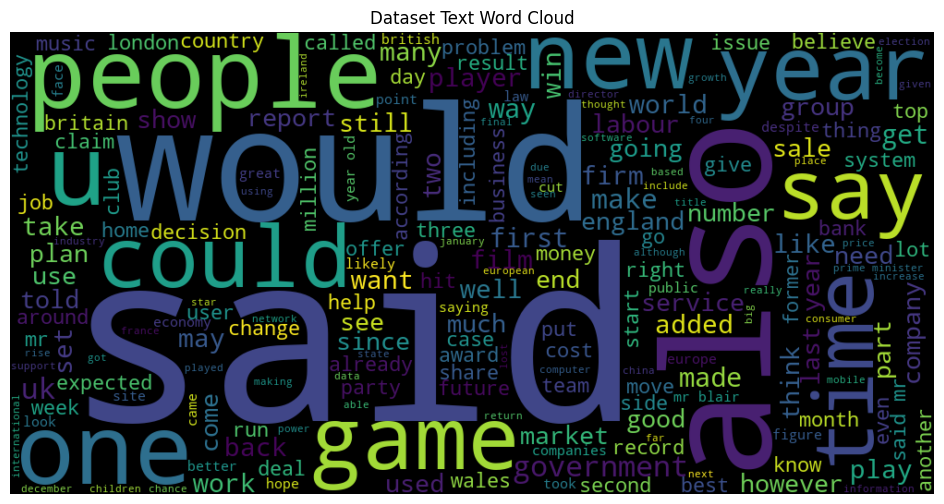

In [18]:
plot_word_cloud(wordcloud=get_word_cloud(input_=data.data), title="Dataset Text Word Cloud")